In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"C:\Users\svire\Downloads\50_Startups.csv")
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df1 = df.drop("State",axis=1)
df1.head()

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

In [6]:
df1.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

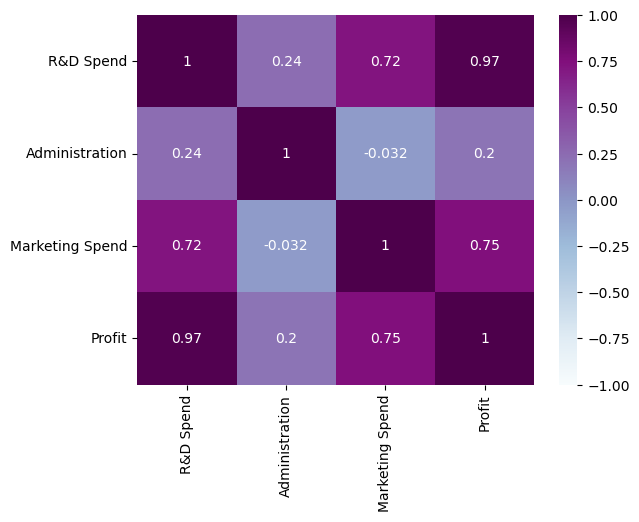

In [7]:
sns.heatmap(df1.corr(),vmin= -1,vmax = 1,annot = True, cmap = 'BuPu')
plt.show()


Printing the Plot for feature:  R&D Spend
***********************************



Printing the Plot for feature:  Administration
***********************************


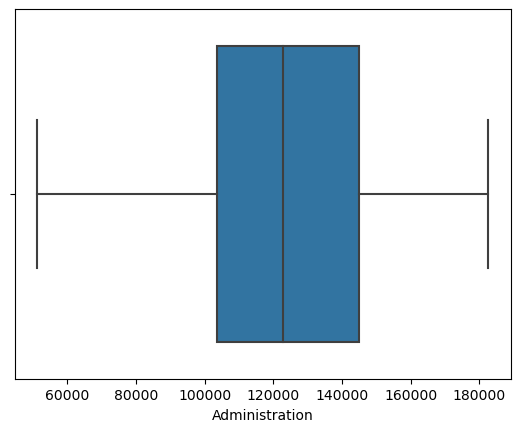


Printing the Plot for feature:  Marketing Spend
***********************************


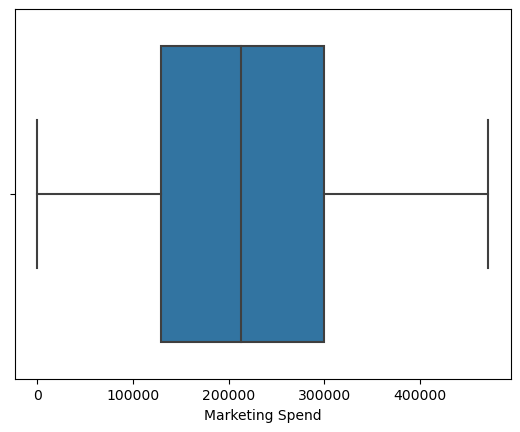


Printing the Plot for feature:  Profit
***********************************


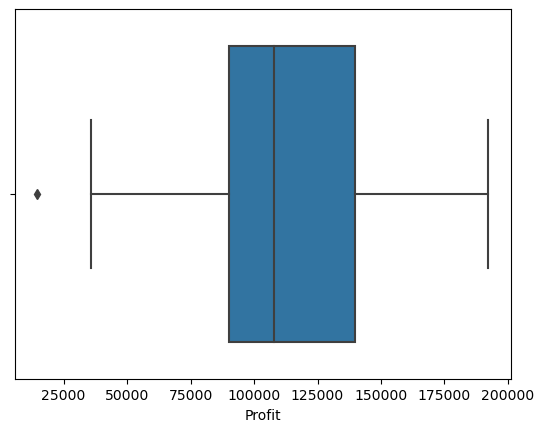

In [8]:
for i in df1.columns:
    if df1[i].dtype == 'int64' or df1[i].dtype == 'float64':
        print('\nPrinting the Plot for feature: ', i)
        print('***********************************')
        sns.boxplot(x=i, data=df)
        plt.show()

In [9]:
import statsmodels.formula.api as smf

In [10]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
myformula = 'Profit ~ Administration'
model = smf.ols(myformula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.162
Time:                        11:35:56   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df = pd.get_dummies(df,['State'])

In [13]:
df.head()

R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83             False   
1  162597.70       151377.59        443898.53  191792.06              True   
2  153441.51       101145.55        407934.54  191050.39             False   
3  144372.41       118671.85        383199.62  182901.99             False   
4  142107.34        91391.77        366168.42  166187.94             False   

   State_Florida  State_New York  
0          False            True  
1          False           False  
2           True           False  
3          False            True  
4           True           False

In [14]:
df['State_California'] = df['State_California'].map({True: 1, False: 0})

In [15]:
df.head()

R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
1  162597.70       151377.59        443898.53  191792.06                 1   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
4  142107.34        91391.77        366168.42  166187.94                 0   

   State_Florida  State_New York  
0          False            True  
1          False           False  
2           True           False  
3          False            True  
4           True           False

In [16]:
df['State_Florida'] = df['State_Florida'].map({True: 1, False: 0})

In [17]:
df['State_New York'] = df['State_New York'].map({True: 1, False: 0})

In [18]:
df.head()

R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
1  162597.70       151377.59        443898.53  191792.06                 1   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
4  142107.34        91391.77        366168.42  166187.94                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

In [19]:
x = df.drop(['Profit'],axis = 1)
y = df[['Profit']]

In [20]:
x.head()

R&D Spend  Administration  Marketing Spend  State_California  \
0  165349.20       136897.80        471784.10                 0   
1  162597.70       151377.59        443898.53                 1   
2  153441.51       101145.55        407934.54                 0   
3  144372.41       118671.85        383199.62                 0   
4  142107.34        91391.77        366168.42                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

In [21]:
y.head()

Profit
0  192261.83
1  191792.06
2  191050.39
3  182901.99
4  166187.94

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 6), (10, 6), (40, 1), (10, 1))

In [23]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = regression_model.predict(x_test)
y_pred

array([[126362.87908255],
       [ 84608.45383633],
       [ 99677.49425146],
       [ 46357.46068582],
       [128750.48288505],
       [ 50912.41741878],
       [109741.35032702],
       [100643.24281647],
       [ 97599.27574593],
       [113097.42524431]])

In [25]:
pd.DataFrame(x_train,columns = x_train.columns)

R&D Spend  Administration  Marketing Spend  State_California  \
12   93863.75       127320.38        249839.44                 0   
4   142107.34        91391.77        366168.42                 0   
37   44069.95        51283.14        197029.42                 1   
8   120542.52       148718.95        311613.29                 0   
3   144372.41       118671.85        383199.62                 0   
6   134615.46       147198.87        127716.82                 1   
41   27892.92        84710.77        164470.71                 0   
46    1315.46       115816.21        297114.46                 0   
47       0.00       135426.92             0.00                 1   
15  114523.61       122616.84        261776.23                 0   
9   123334.88       108679.17        304981.62                 1   
16   78013.11       121597.55        264346.06                 1   
24   77044.01        99281.34        140574.81                 0   
34   46426.07       157693.92        210797.67                 1   
31   61136.38       152701.92         88218.23                 0   
0   165349.20       136897.80        471784.10                 0   
44   22177.74       154806.14         28334.72                 1   
27   72107.60       127864.55        353183.81                 0   
33   55493.95       103057.49        214634.81                 0   
5   131876.90        99814.71        362861.36                 0   
29   65605.48       153032.06        107138.38                 0   
11  100671.96        91790.61        249744.55                 1   
36   28663.76       127056.21        201126.82                 0   
1   162597.70       151377.59        443898.53                 1   
21   78389.47       153773.43        299737.29                 0   
2   153441.51       101145.55        407934.54                 0   
43   15505.73       127382.30         35534.17                 0   
35   46014.02        85047.44        205517.64                 0   
23   67532.53       105751.03        304768.73                 0   
40   28754.33       118546.05        172795.67                 1   
10  101913.08       110594.11        229160.95                 0   
22   73994.56       122782.75        303319.26                 0   
18   91749.16       114175.79        294919.57                 0   
49       0.00       116983.80         45173.06                 1   
20   76253.86       113867.30        298664.47                 1   
7   130298.13       145530.06        323876.68                 0   
42   23640.93        96189.63        148001.11                 1   
14  119943.24       156547.42        256512.92                 0   
28   66051.52       182645.56        118148.20                 0   
38   20229.59        65947.93        185265.10                 0   

    State_Florida  State_New York  
12              1               0  
4               1               0  
37              0               0  
8               0               1  
3               0               1  
6               0               0  
41              1               0  
46              1               0  
47              0               0  
15              0               1  
9               0               0  
16              0               0  
24              0               1  
34              0               0  
31              0               1  
0               0               1  
44              0               0  
27              0               1  
33              1               0  
5               0               1  
29              0               1  
11              0               0  
36              1               0  
1               0               0  
21              0               1  
2               1               0  
43              0               1  
35              0               1  
23              1               0  
40              0               0  
10              1               0  
22              1               0  
18              1          

In [26]:
y_pred_train = regression_model.predict(x_train)
y_pred_train

array([[129287.25932268],
       [174098.25202593],
       [ 91886.85822583],
       [150220.99659018],
       [173623.19035613],
       [156165.8448994 ],
       [ 76521.47893708],
       [ 56930.33870618],
       [ 44712.30856353],
       [145679.58311298],
       [155019.87822279],
       [116405.47712515],
       [113471.56812687],
       [ 86876.30432594],
       [ 95418.08570239],
       [191913.72740386],
       [ 62092.25276451],
       [113876.00520382],
       [ 98993.33790338],
       [164246.36680449],
       [ 99560.6868471 ],
       [136274.54962572],
       [ 75324.02207359],
       [187861.47839017],
       [115558.98201753],
       [183805.40426655],
       [ 58825.43932911],
       [ 91390.89209793],
       [111197.68506735],
       [ 74197.75183479],
       [136305.24077721],
       [115188.84018879],
       [129833.75780391],
       [ 47329.63344538],
       [116544.51129348],
       [159597.70047234],
       [ 70875.8412832 ],
       [148486.45402746],
       [ 991

In [27]:
r2_score(y_train,y_pred_train)

0.9537019995248526

In [28]:
r2_score(y_test,y_pred)

0.8987266414329449

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
variables = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

VIF          features
0  19.604937         R&D Spend
1   1.184921    Administration
2   2.552858   Marketing Spend
3  20.305593            Profit
4  19.939371  State_California
5  19.779492     State_Florida
6  20.100087    State_New York

In [36]:
findcarpred = df.copy()

In [38]:
findcarpred.head()

R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
1  162597.70       151377.59        443898.53  191792.06                 1   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
4  142107.34        91391.77        366168.42  166187.94                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

In [40]:
findcarpred['ypred'] = regression_model.predict(x)

In [41]:
findcarpred['Error'] =findcarpred['Profit']-findcarpred['ypred']

In [42]:
findcarpred['Error'].head()

0     348.102596
1    3930.581610
2    7244.985733
3    9278.799644
4   -7910.312026
Name: Error, dtype: float64

In [43]:
findcarpred['Error'] = findcarpred['Profit']-findcarpred['ypred']

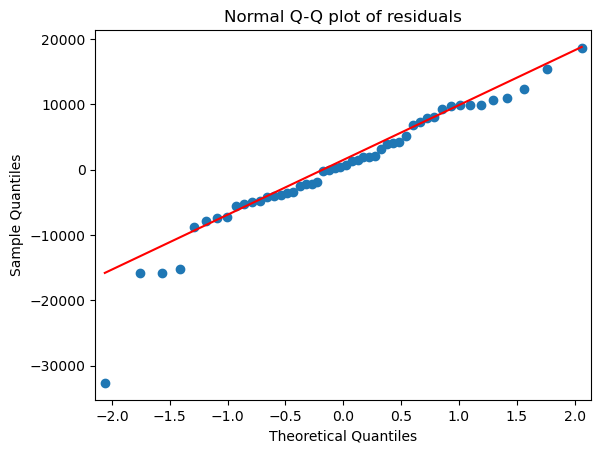

In [44]:
import statsmodels.api as sm
sm.qqplot(findcarpred['Error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [45]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [46]:
len(df)

50

In [47]:
myrows = np.arange(df.shape[0])
myinfluence = np.round(c, 3)

In [48]:
myrows

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [49]:
myinfluence

array([0.05 , 0.075, 0.074, 0.034, 0.059, 0.028, 0.017, 0.016, 0.014,
       0.014, 0.01 , 0.024, 0.005, 0.003, 0.002, 0.002, 0.001, 0.   ,
       0.001, 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.001, 0.002,
       0.001, 0.033, 0.006, 0.001, 0.009, 0.002, 0.001, 0.013, 0.   ,
       0.004, 0.   , 0.008, 0.008, 0.007, 0.011, 0.014, 0.013, 0.054,
       0.015, 0.025, 0.045, 0.199, 0.062])

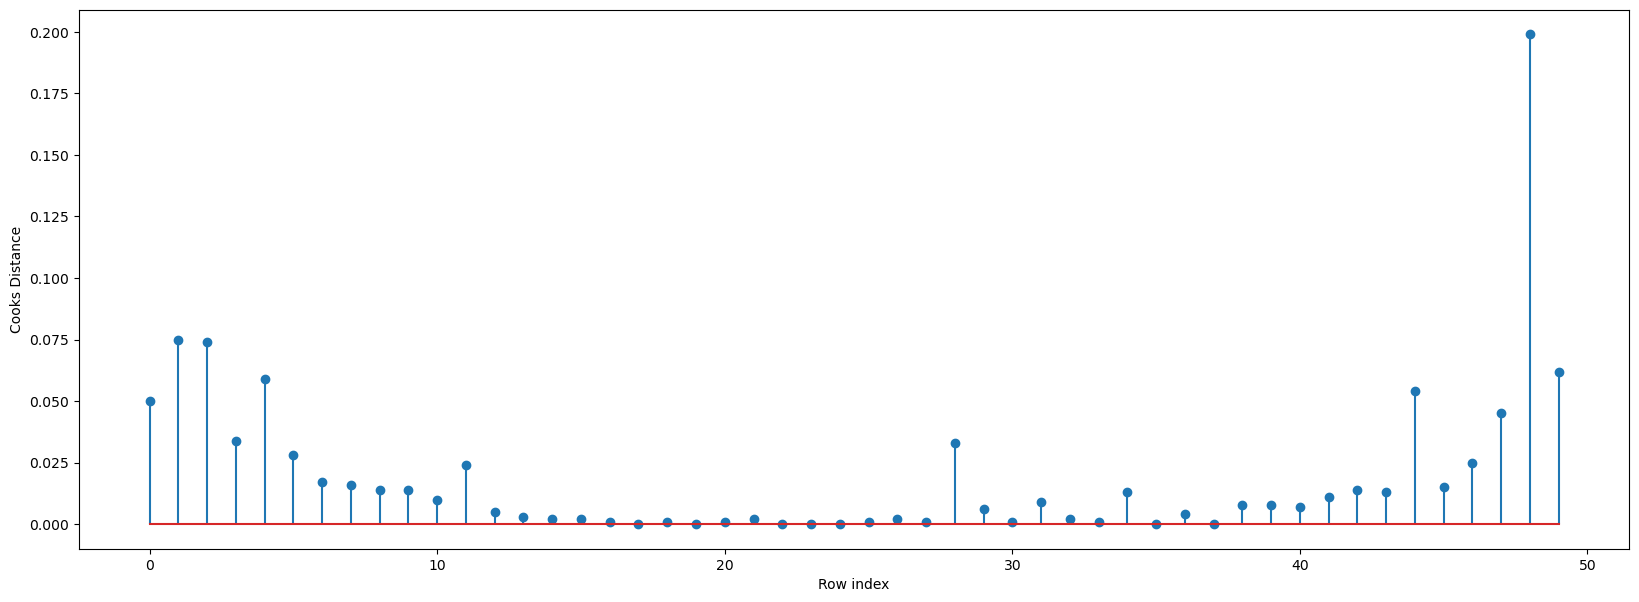

In [50]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(myrows, myinfluence)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(48, 0.19881905369715203)

In [52]:
n = df.shape[0]
k = df.shape[1]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.48


In [53]:
model_cooksd = model.get_influence().cooks_distance[0]
n= df.shape[0]
critical_d = 4/n
print(n, critical_d)

50 0.08


In [54]:
print('Critical Cooks distance:', critical_d)
out_d = model_cooksd > critical_d
print(df.index[out_d], "\n", 
    model_cooksd[out_d])

Critical Cooks distance: 0.08
Index([48], dtype='int64') 
 [0.19881905]
